# Flight Price- Prediction Project

# Overview:-

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 

1. Time of purchase patterns (making sure last-minute purchases are expensive) 

2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases) 

So, we have to work on a project where we collect data of flight fares with other features and work to make a model to predict fares of flights.

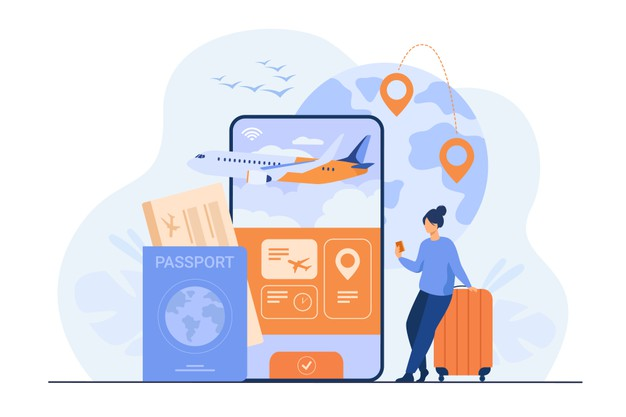

In [2]:
#Flight Price prediction image
from IPython import display
display.Image("fp.jpg")

# Problem Statement:-
This project contains three phases:-

1. Data Collection Phase:-

WE have to scrape at least 1500 rows of data. We can scrape more data as well, it’s up to us, More the data better the model.In this section we have to scrape the data of flights from different websites. The number of columns for data doesn’t have limit, it’s up to us and our creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. We can make changes to it, we can add or we can remove some columns, it completely depends on the website from which we are fetching the data.

2. Data Analysis Phase:-

After cleaning the data, we have to do some analysis on the data. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

3. Model Building Phase:-

After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps like.

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model

# Business Goal:-
First we need to collect flight price data from different websites using web scraping techniques and then need to build a machine learning model.

Target Variable:- Target Variable is Price in this project and it is continuous in nature so we will use Regression algorithms to make our model.

# DataSet Information:-
Dataset:- Different columns are as:-

1- Airline

2-Journey_date

3-Source

4-Destination

5-Departure Time

6-Arrival Time

7-Stops

8-Price

# Software & Hardware Requirements:-
We have used Python and Jupyter Notebook to compute the majority of this case study. Packages and libraries used in this project are:-

1- Pandas (data analysis)

2- Numpy (matrix computation)

3- Matplotlib.pyplot (Visualization)

4- Seaborn (visualization)

5- Scikit-Learn (Machine Learning)

6- Scipy (Z-score)

7- Joblib (saving final model)

8- Selenium Webdriver & Exceptions

9- Warnings (filter warnings) & etc. Microsoft Excel ( for calculations and Data Handling)

Processor used:- Intel I3

O/s used: 64bit Windows 10

RAM:4GB

# Steps used in this project:-
1- Define the Problem

2- Data Gathering

3- Data Cleaning

4- Data Exploration and Visualization

5- Train the algorithm

6- Evaluate our model using evaluation metrics & etc.

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing dataset
df=pd.read_csv('flight_price.csv')
df

,Unnamed: 0,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,1,Spicejet,15/10/2021,Goa,Ahmedabad,14:50,17:00,Non stop,5315.0
1,2,Go First,15/10/2021,Goa,Ahmedabad,15:40,17:10,Non stop,5315.0
2,3,Spicejet,15/10/2021,Goa,Ahmedabad,19:40,21:40,Non stop,5315.0
3,4,Go First,15/10/2021,Goa,Ahmedabad,20:25,22:05,Non stop,5315.0
4,5,Go First,15/10/2021,Goa,Ahmedabad,16:15,21:05,1 stop via Mumbai,5315.0
...,...,...,...,...,...,...,...,...,...
2290,2291,"IndiGo, Go First",17/10/2021,Kolkata,Goa,08:35,15:10,1 stop via Bengaluru,13871.0
2291,2292,"Spicejet, Go First",17/10/2021,Kolkata,Goa,08:50,15:10,1 stop via Bengaluru,13975.0
2292,2293,Go First,17/10/2021,Kolkata,Goa,05:30,11:40,1 stop via Jaipur,15640.0
2293,2294,Vistara,17/10/2021,Kolkata,Goa,07:10,13:50,1 stop via New Delhi,17934.0


In [5]:
#Removing Column "Unnamed:0 as it will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,Spicejet,15/10/2021,Goa,Ahmedabad,14:50,17:00,Non stop,5315.0
1,Go First,15/10/2021,Goa,Ahmedabad,15:40,17:10,Non stop,5315.0
2,Spicejet,15/10/2021,Goa,Ahmedabad,19:40,21:40,Non stop,5315.0
3,Go First,15/10/2021,Goa,Ahmedabad,20:25,22:05,Non stop,5315.0
4,Go First,15/10/2021,Goa,Ahmedabad,16:15,21:05,1 stop via Mumbai,5315.0
...,...,...,...,...,...,...,...,...
2290,"IndiGo, Go First",17/10/2021,Kolkata,Goa,08:35,15:10,1 stop via Bengaluru,13871.0
2291,"Spicejet, Go First",17/10/2021,Kolkata,Goa,08:50,15:10,1 stop via Bengaluru,13975.0
2292,Go First,17/10/2021,Kolkata,Goa,05:30,11:40,1 stop via Jaipur,15640.0
2293,Vistara,17/10/2021,Kolkata,Goa,07:10,13:50,1 stop via New Delhi,17934.0


In [6]:
#Shape of our Dataset after removal of 3 Columns
print("Shape of our dataset is ",df.shape)
print("Column count in our dataset is",df.shape[1])
print("Row count in our dataset is ",df.shape[0])

Shape of our dataset is  (2295, 8)
Column count in our dataset is 8
Row count in our dataset is  2295


In [7]:
#Let's check type of data in our Dataset
df.dtypes

Airline          object
Journey_date     object
From             object
To               object
Dtime            object
Atime            object
Stops            object
Price           float64
dtype: object

In [8]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())
print("\nPlease see the detail below:-")
df.isna()

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64

Please see the detail below:-


,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2290,False,False,False,False,False,False,False,False
2291,False,False,False,False,False,False,False,False
2292,False,False,False,False,False,False,False,False
2293,False,False,False,False,False,False,False,False


In [9]:
#Let's check our columns in detail
df.columns

Index(['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops',
       'Price'],
      dtype='object')

In [10]:
#Concise Summary of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       2295 non-null   object 
 1   Journey_date  2295 non-null   object 
 2   From          2295 non-null   object 
 3   To            2295 non-null   object 
 4   Dtime         2295 non-null   object 
 5   Atime         2295 non-null   object 
 6   Stops         2295 non-null   object 
 7   Price         2295 non-null   float64
dtypes: float64(1), object(7)
memory usage: 143.6+ KB


In [11]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique()) 

Column-wise Unique values are as:-

 Unique values in  Airline  column is  36

 Unique values in  Journey_date  column is  17

 Unique values in  From  column is  4

 Unique values in  To  column is  9

 Unique values in  Dtime  column is  147

 Unique values in  Atime  column is  180

 Unique values in  Stops  column is  43

 Unique values in  Price  column is  542


In [12]:
#checking size of dataFrame
df.size

18360

In [13]:
#Let's check value count of object datatype columns
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

IndiGo                 1070
Go First                383
AirAsia                 329
Spicejet                176
Air India               106
Vistara                  72
Go First, IndiGo         13
AirAsia, IndiGo          11
IndiGo, Air India        10
Spicejet, AirAsia        10
IndiGo, Go First         10
Spicejet, IndiGo          9
IndiGo, Spicejet          8
Go First, AirAsia         8
Vistara, Go First         8
AirAsia, Spicejet         7
Go First, Air India       7
IndiGo, AirAsia           7
Vistara, IndiGo           7
Air India, IndiGo         6
Go First, Spicejet        6
Spicejet, Go First        5
AirAsia, Go First         4
Vistara, Air India        4
Air India, AirAsia        3
Spicejet, TruJet          2
Go First, TruJet          2
Vistara, AirAsia          2
Air India, Spicejet       2
Air India, Go First       2
AirAsia, Air India        1
Air India, Vistara        1
Spicejet, Air India       1
IndiGo, Vistara           1
Vistara, Spicejet         1
AirAsia, TruJet     

<AxesSubplot:>

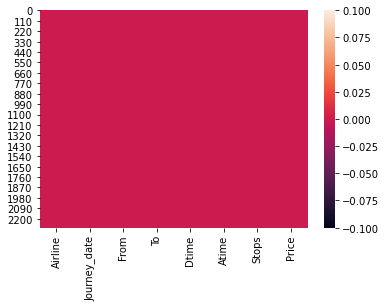

In [14]:
#To check missing values using Seaborn Heatmap
sns.heatmap(df.isnull())

Observation:

Dataset has no missing values.

# Data Visualization

# Univariate Analysis

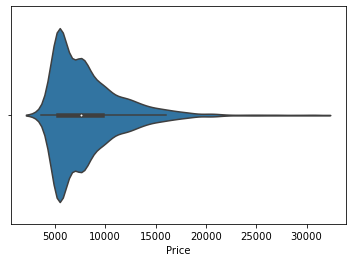

In [15]:
#Let's explore our target variable "Price" using violinPlot
sns.violinplot(df['Price'])
plt.show()

In [16]:
#checking its value_counts
df['Price'].value_counts()

5316.0     199
5315.0     168
7622.0     131
7626.0     127
5060.0     101
          ... 
30560.0      1
8003.0       1
15615.0      1
15143.0      1
17601.0      1
Name: Price, Length: 542, dtype: int64

Observation:

Maximum number of flight Prices range between 5316-5060.

# Exploring Input Features

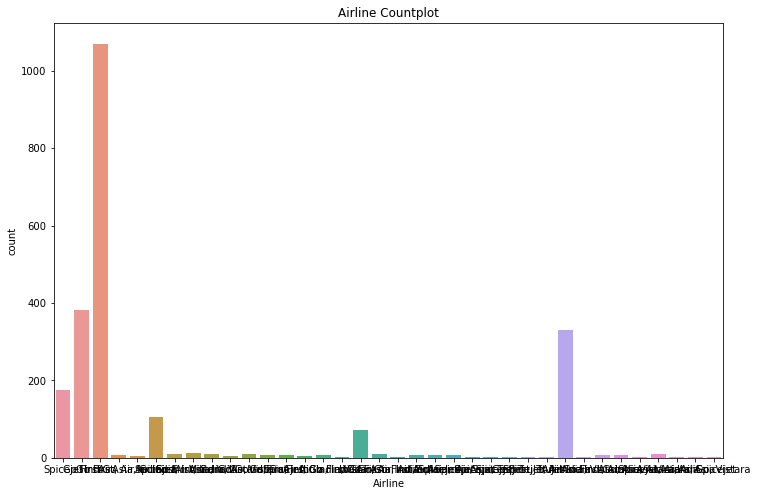

In [17]:
#Let's explore "Airline" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Airline", data=df)
plt.title("Airline Countplot")
plt.xlabel('Airline')
plt.ylabel("count")
plt.show()

In [18]:
df['Airline'].value_counts()

IndiGo                 1070
Go First                383
AirAsia                 329
Spicejet                176
Air India               106
Vistara                  72
Go First, IndiGo         13
AirAsia, IndiGo          11
IndiGo, Air India        10
Spicejet, AirAsia        10
IndiGo, Go First         10
Spicejet, IndiGo          9
IndiGo, Spicejet          8
Go First, AirAsia         8
Vistara, Go First         8
AirAsia, Spicejet         7
Go First, Air India       7
IndiGo, AirAsia           7
Vistara, IndiGo           7
Air India, IndiGo         6
Go First, Spicejet        6
Spicejet, Go First        5
AirAsia, Go First         4
Vistara, Air India        4
Air India, AirAsia        3
Spicejet, TruJet          2
Go First, TruJet          2
Vistara, AirAsia          2
Air India, Spicejet       2
Air India, Go First       2
AirAsia, Air India        1
Air India, Vistara        1
Spicejet, Air India       1
IndiGo, Vistara           1
Vistara, Spicejet         1
AirAsia, TruJet     

Observation:

Indigo,Go First & AirAsia are most popular brands.

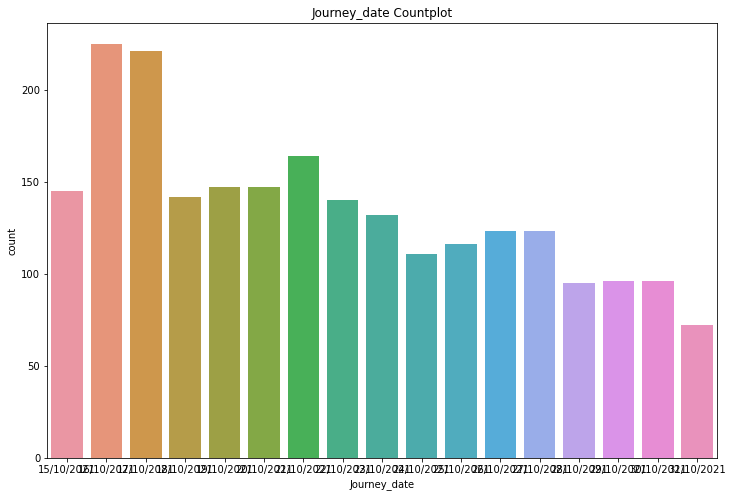

In [19]:
#Let's explore "Journey_date" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Journey_date", data=df)
plt.title("Journey_date Countplot")
plt.xlabel('Journey_date')
plt.ylabel("count")
plt.show()

In [20]:
df['Journey_date'].value_counts()

16/10/2021    225
17/10/2021    221
21/10/2021    164
20/10/2021    147
19/10/2021    147
15/10/2021    145
18/10/2021    142
22/10/2021    140
23/10/2021    132
27/10/2021    123
26/10/2021    123
25/10/2021    116
24/10/2021    111
29/10/2021     96
30/10/2021     96
28/10/2021     95
31/10/2021     72
Name: Journey_date, dtype: int64

Observation:

16-10-2021 & 17-10-2021 dates have maximum bookings and 31-10-2021 have minimum bookings.

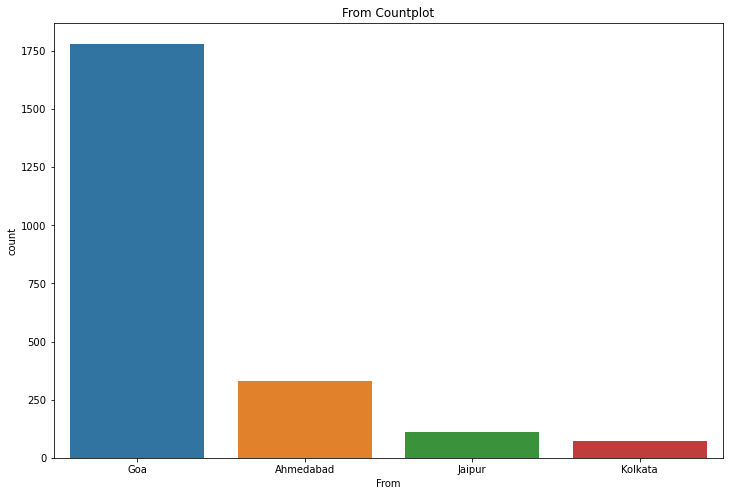

In [21]:
#Let's explore "From" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="From", data=df)
plt.title("From Countplot")
plt.xlabel('From')
plt.ylabel("count")
plt.show()

In [22]:
df['From'].value_counts()

Goa          1781
Ahmedabad     331
Jaipur        109
Kolkata        74
Name: From, dtype: int64

Observation:

For source, Maximum bookings done from Goa and minimum bookings done from kolkata.

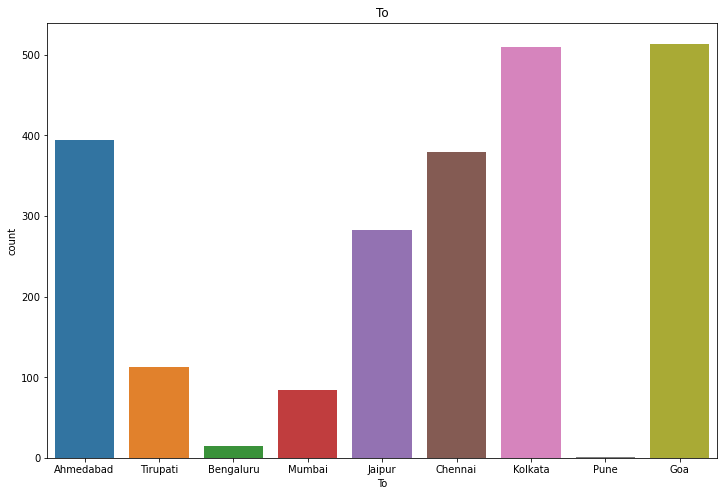

In [23]:
#Let's explore "To" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="To", data=df)
plt.title("To")
plt.xlabel('To')
plt.ylabel("count")
plt.show()

In [24]:
df['To'].value_counts()

Goa          514
Kolkata      510
Ahmedabad    395
Chennai      380
Jaipur       283
Tirupati     113
Mumbai        84
Bengaluru     15
Pune           1
Name: To, dtype: int64

Observation:

For Destination, Maximum bookings done for Goa & minimum bookings done for Pune.

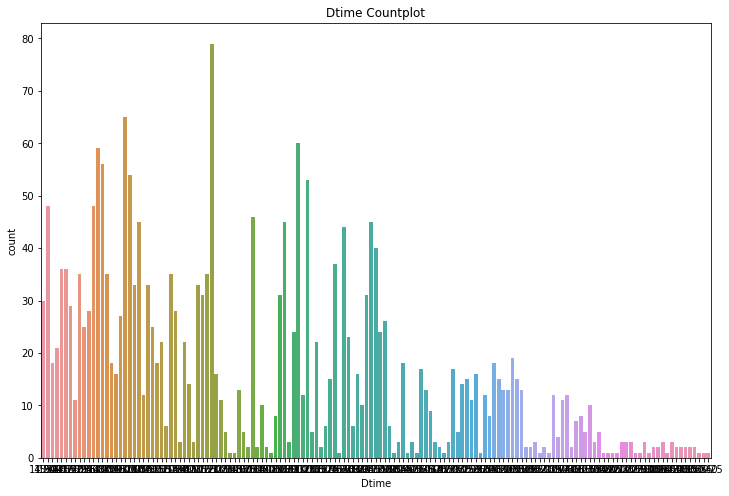

In [25]:
#Let's explore "Dtime" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Dtime", data=df)
plt.title("Dtime Countplot")
plt.xlabel('Dtime')
plt.ylabel("count")
plt.show()

In [26]:
df['Dtime'].value_counts()

12:10    79
09:15    65
09:00    60
16:30    59
14:40    56
         ..
19:00     1
16:55     1
10:20     1
07:25     1
17:00     1
Name: Dtime, Length: 147, dtype: int64

Observation:

Most of the Flight departed at 12:10 & in night very few flights departed.

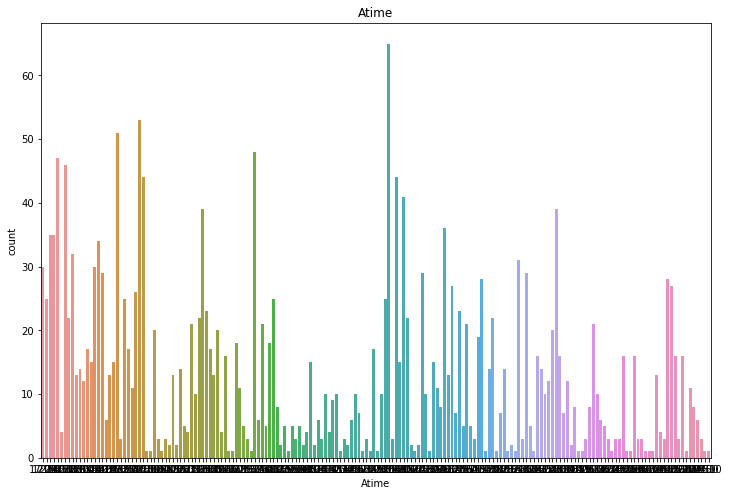

In [27]:
#Let's explore "Atime" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Atime", data=df)
plt.title("Atime")
plt.xlabel('Atime')
plt.ylabel("count")
plt.show()

In [28]:
df['Atime'].value_counts()

23:15    65
06:50    53
17:15    51
19:25    48
21:05    47
         ..
23:35     1
23:45     1
22:10     1
07:55     1
10:35     1
Name: Atime, Length: 180, dtype: int64

Observation:

Maximum flights arrived at 23:15 & less flights arrived in morning.

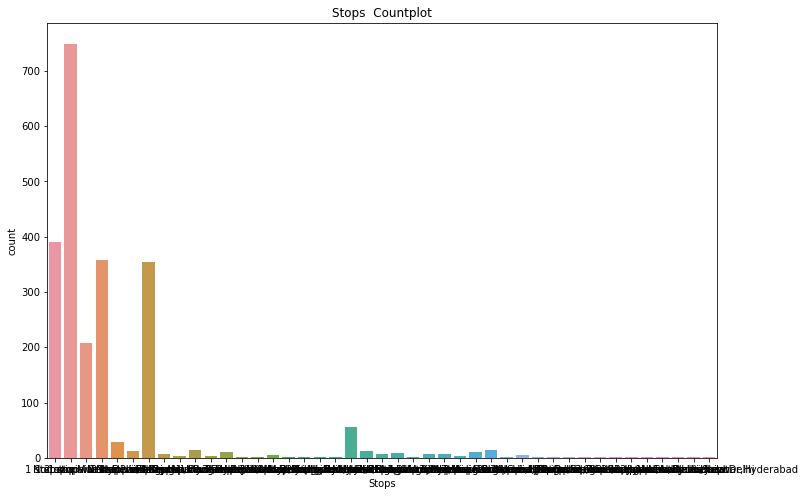

In [29]:
#Let's explore "Stops" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Stops", data=df)
plt.title("Stops  Countplot")
plt.xlabel('Stops')
plt.ylabel("count")
plt.show()

In [30]:
df['Stops'].value_counts()

1 stop via Mumbai                               749
Non stop                                        390
1 stop via Hyderabad                            357
1 stop via Bengaluru                            354
1 stop via New Delhi                            207
1 stop via Ahmedabad                             55
2 stop via Mumbai,Bengaluru                      29
2 stop via Ahmedabad,Jaipur                      15
2 stop via Mumbai,Hyderabad                      14
2 stop via Hyderabad,Bengaluru                   13
1 stop via Nagpur                                12
2 stop via New Delhi,Mumbai                      11
1 stop via Chennai                               11
2 stop via Bengaluru,Mumbai                       8
3 stop via Mumbai,Bengaluru,Hyderabad             7
2 stop via Mumbai,New Delhi                       7
1 stop via Indore                                 6
1 stop via Kannur                                 6
2 stop via Mumbai,Bhubaneswar                     5
2 stop via S

Observation:

Most of the flights have stoppage at Mumbai and many flights are non stop.

# Bivariate Analysis

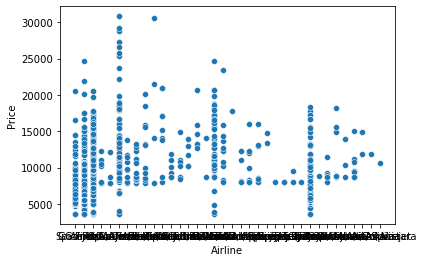

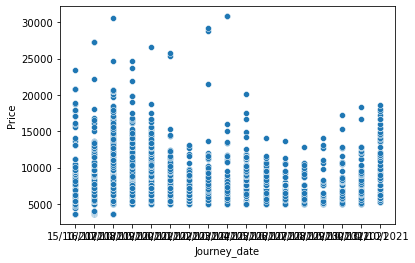

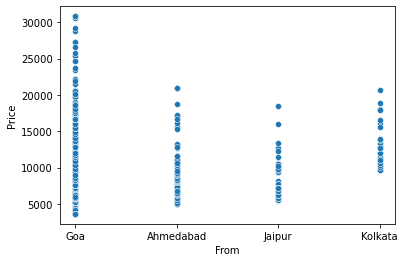

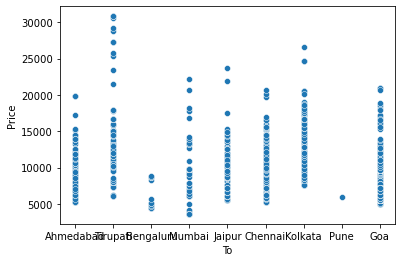

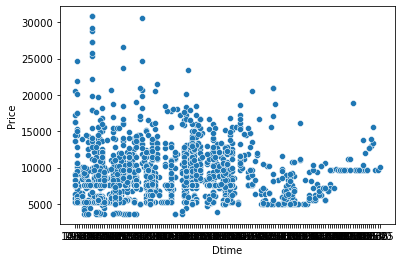

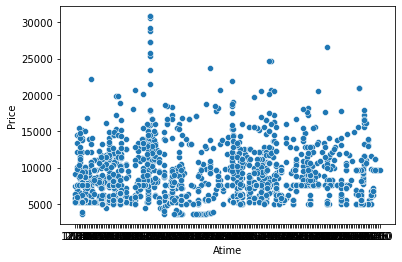

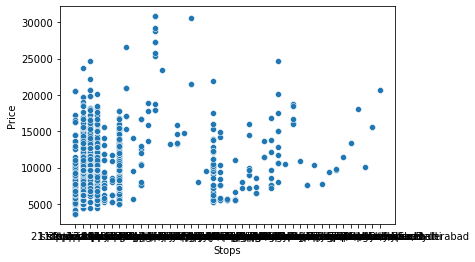

In [31]:
#Scatter Plots between output & Input variables
out_var=df['Price']
input_var=df.drop(['Price'],axis=1)
for i in input_var.columns:
    plt.subplots()
    sns.scatterplot(input_var[i],out_var)

In [32]:
#making different lists for categorical & continuous variables
category_features=[x for x in df.columns if df[x].dtype==object]
cont_features=[x for x in df.columns if x not in category_features]
list(category_features)

['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops']

In [33]:
#Continuous list
list(cont_features)

['Price']

<Figure size 1512x1008 with 0 Axes>

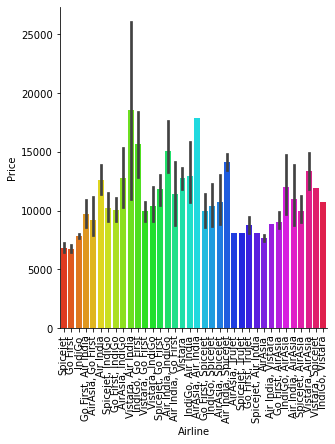

<Figure size 1512x1008 with 0 Axes>

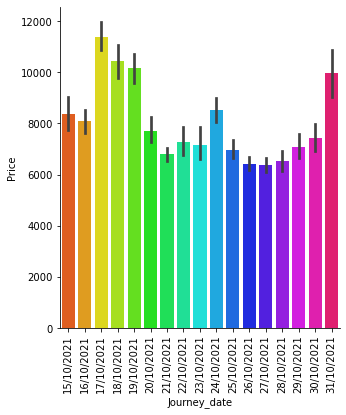

<Figure size 1512x1008 with 0 Axes>

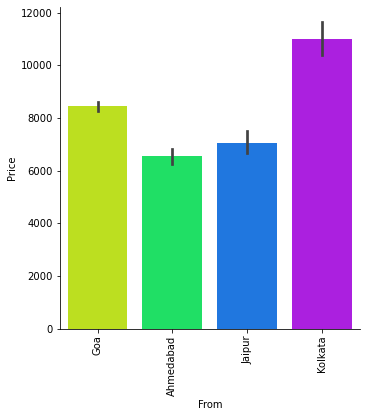

<Figure size 1512x1008 with 0 Axes>

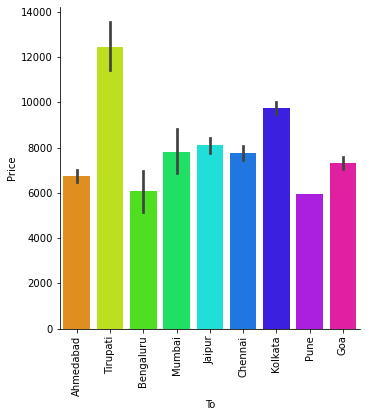

<Figure size 1512x1008 with 0 Axes>

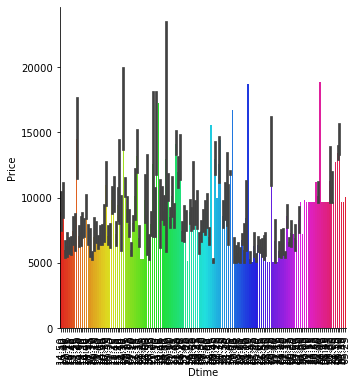

<Figure size 1512x1008 with 0 Axes>

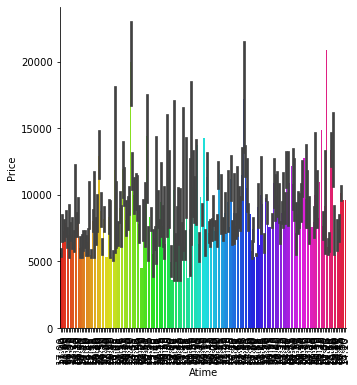

<Figure size 1512x1008 with 0 Axes>

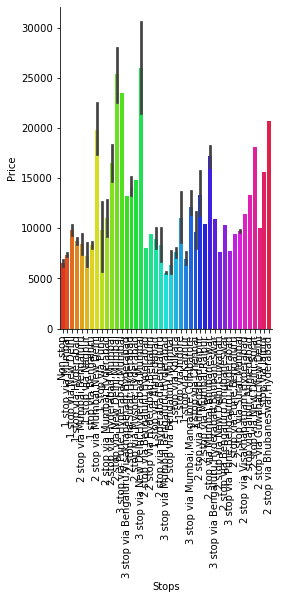

In [34]:
#Catplot between output feature & categorical input feartures
for i in category_features:
    plt.figure(figsize=(21,14))
    sns.catplot(y='Price',x=i,data=df,kind="bar",palette="hsv")
    plt.xticks(rotation=90)
    plt.show()

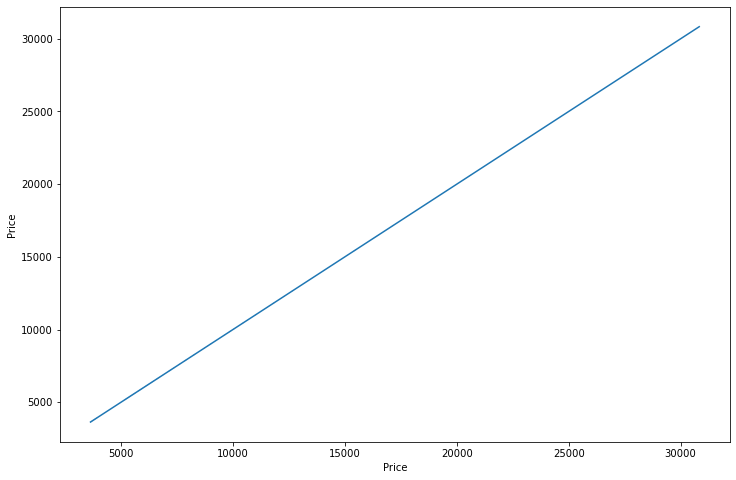

In [35]:
#Lineplot between output feature & Continuous input feartures
for i in cont_features:
    plt.figure(figsize=(12,8))
    sns.lineplot(y='Price',x=i,data=df)
    plt.show()

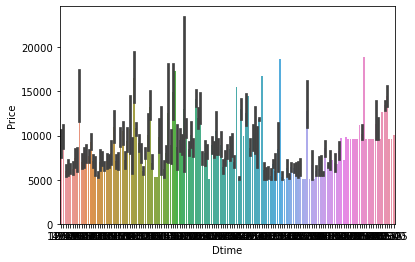

In [37]:
#Lets chcek when the averge price of the flights on basis of departure timing
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Dtime",y="Price",data=df)
plt.show()

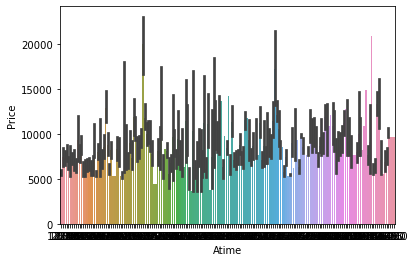

In [38]:
#Lets chcek when the averge price of the flights on basis of Arrival timing
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Atime",y="Price",data=df)
plt.show()

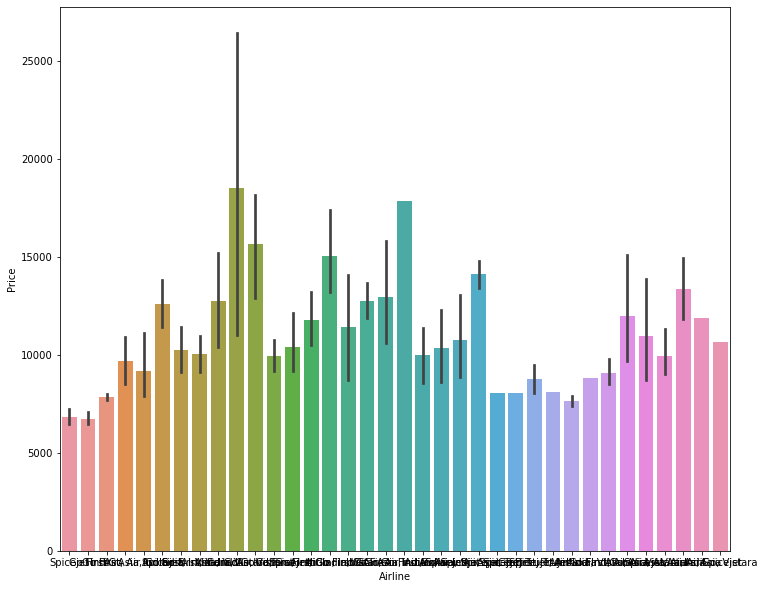

In [40]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(12,10))
sns.barplot(x="Airline",y="Price",data=df)
plt.show()

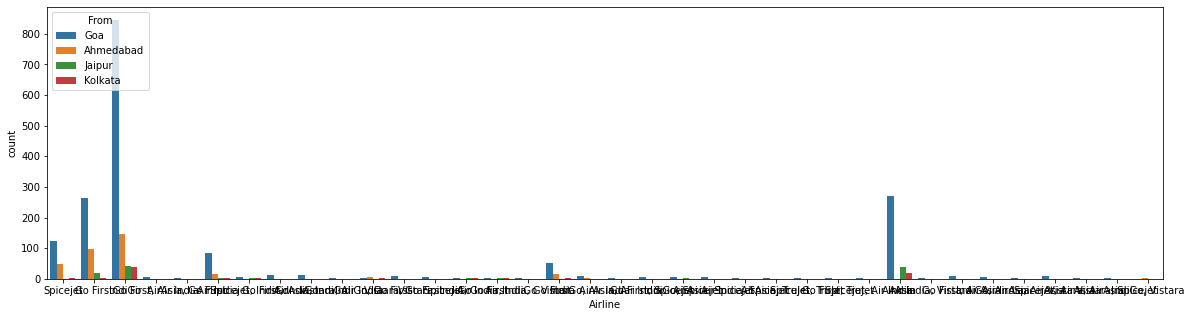

In [43]:
#Lets chcek the most popular flight region wise (Source)
plt.figure(figsize=(20,5))
sns.countplot(x="Airline",hue="From",data=df)
plt.show()

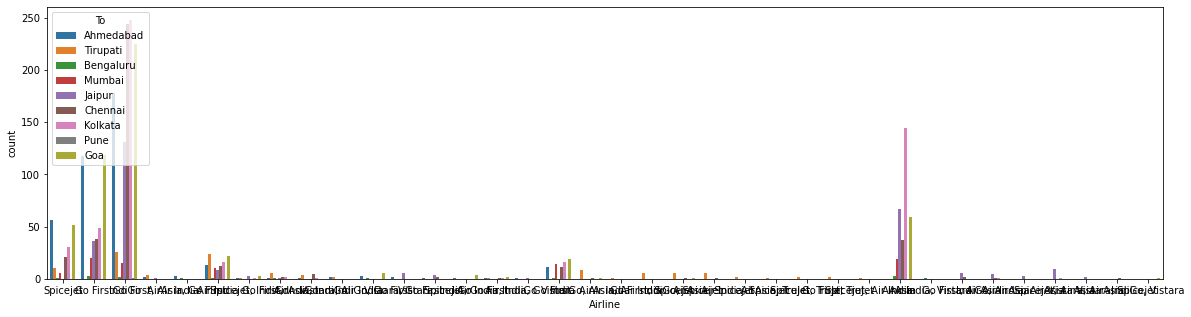

In [44]:
#Lets chcek the most popular flight region wise (Destination)
plt.figure(figsize=(20,5))
sns.countplot(x="Airline",hue="To",data=df)
plt.show()

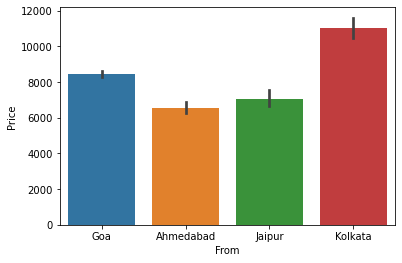

In [45]:
#Lets chcek from which region averge price of the flight was more
sns.barplot(x="From",y="Price",data=df)
plt.show()

Observation:
    
1- Maximum Price for flight booking when kolkata is source city.

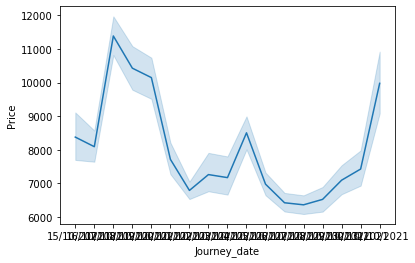

In [46]:
#lets draw a line plot between Journey_date and price
sns.lineplot(x="Journey_date",y="Price",data=df)
plt.show()

# Feature Engineering

In [48]:
#Encoding categorical data in to numerical format for better processing using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i].astype(str))

In [49]:
#Concise Summary of our DataFrame after Feature Engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       2295 non-null   int32  
 1   Journey_date  2295 non-null   int32  
 2   From          2295 non-null   int32  
 3   To            2295 non-null   int32  
 4   Dtime         2295 non-null   int32  
 5   Atime         2295 non-null   int32  
 6   Stops         2295 non-null   int32  
 7   Price         2295 non-null   float64
dtypes: float64(1), int32(7)
memory usage: 80.8 KB


# Histogram of individual features

array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Journey_date'}>,
        <AxesSubplot:title={'center':'From'}>],
       [<AxesSubplot:title={'center':'To'}>,
        <AxesSubplot:title={'center':'Dtime'}>,
        <AxesSubplot:title={'center':'Atime'}>],
       [<AxesSubplot:title={'center':'Stops'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

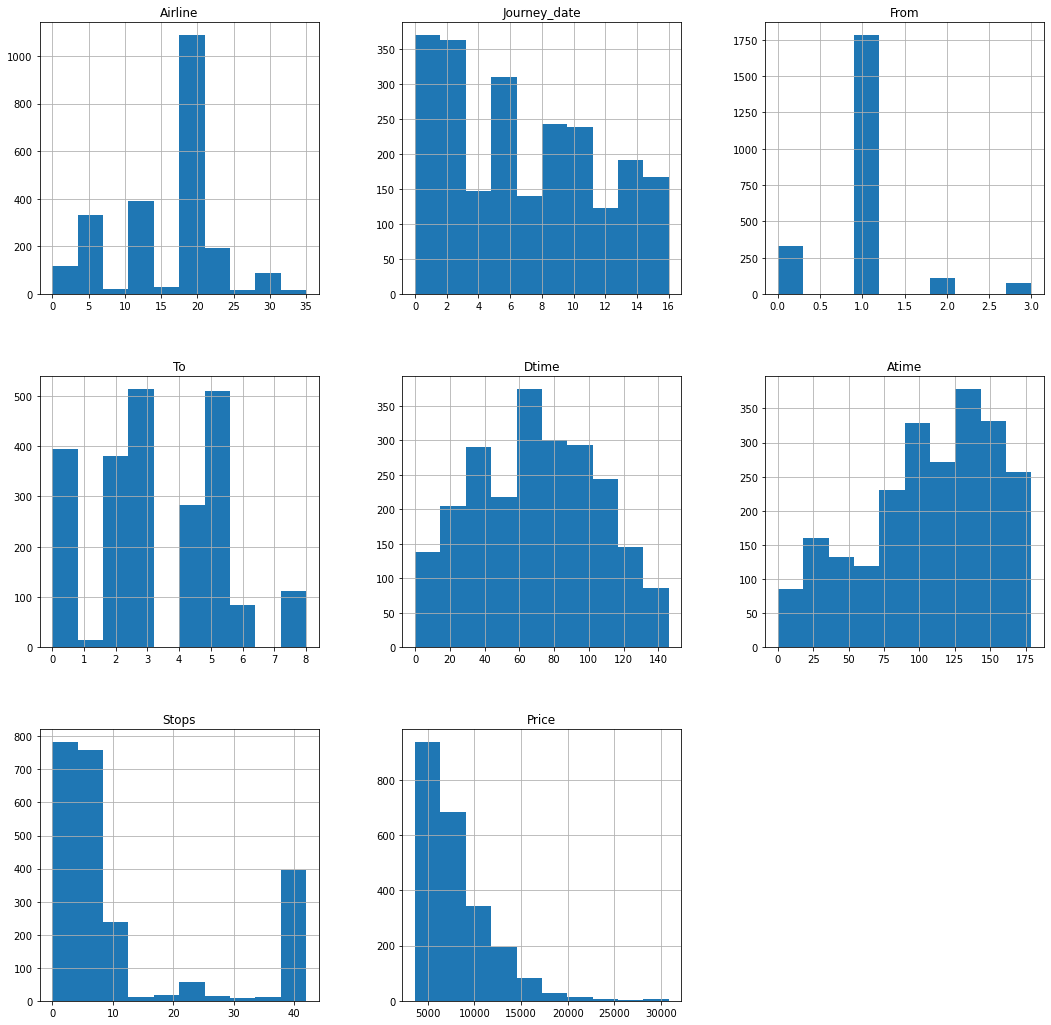

In [50]:
# histogram of individual feature using hist function
df.hist(figsize=(18,18),grid=True)

Observation:

Presence of unusual values in above histograms & also distribution is not normal in some columns and these things denote the possibility of potential outliers.

# Multivariate Analysis

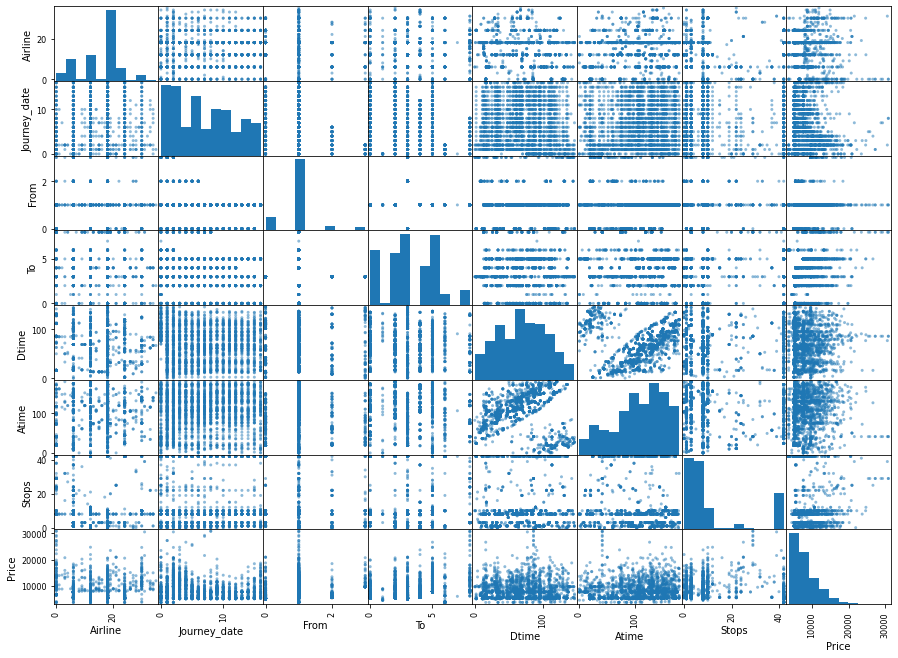

In [51]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,11),grid=True)
plt.show()

Observation:

Using multivariate analysis we can look at the interactions between the variables.Scatterplots of all pair of attributes helps us to spot structured relationship between input variables.

# SUMMARY STATISTICS

In [52]:
#Lets describe the dataset
df.describe()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,15.334641,6.795207,0.967756,3.230501,69.849673,106.884967,12.832680,8188.997821
std,6.893732,4.749329,0.565506,2.066154,35.430133,46.441335,14.319613,3558.418345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3635.000000
25%,12.000000,2.000000,1.000000,2.000000,37.000000,76.000000,3.000000,5316.000000
50%,18.000000,6.000000,1.000000,3.000000,69.000000,111.000000,8.000000,7622.000000
75%,18.000000,11.000000,1.000000,5.000000,96.000000,144.000000,10.000000,9639.000000
max,35.000000,16.000000,3.000000,8.000000,146.000000,179.000000,42.000000,30832.000000


In [53]:
#checking Transpose of Statistical summary to get better understanding:-
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Airline,2295.0,15.334641,6.893732,0.0,12.0,18.0,18.0,35.0
Journey_date,2295.0,6.795207,4.749329,0.0,2.0,6.0,11.0,16.0
From,2295.0,0.967756,0.565506,0.0,1.0,1.0,1.0,3.0
To,2295.0,3.230501,2.066154,0.0,2.0,3.0,5.0,8.0
Dtime,2295.0,69.849673,35.430133,0.0,37.0,69.0,96.0,146.0
Atime,2295.0,106.884967,46.441335,0.0,76.0,111.0,144.0,179.0
Stops,2295.0,12.832680,14.319613,0.0,3.0,8.0,10.0,42.0
Price,2295.0,8188.997821,3558.418345,3635.0,5316.0,7622.0,9639.0,30832.0


Observations:

1- For input features, Arrival Time has highest standard deviation of 46.44.

2- Maximum Price of flight is 30832.0 and minimum price is 3635.0.

3- In input features Journey_Date,Destination,Departure Timing & Stops,the value of mean is considerably greater than median so there are strong chances of positive skewness.

4- In remaining input columns, value of median is greater than mean so the columns are negatively skewed.

# Correlation Matrix

In [54]:
#Let's check correlation in our Dataset
dfcor=df.corr()
dfcor

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
Airline,1.000000,0.031479,-0.100328,-0.140966,-0.101788,0.106182,0.131230,-0.006864
Journey_date,0.031479,1.000000,-0.235533,-0.144628,-0.070290,0.090969,-0.026124,-0.231090
From,-0.100328,-0.235533,1.000000,0.006364,0.037571,-0.013603,-0.188970,0.181667
To,-0.140966,-0.144628,0.006364,1.000000,-0.027008,-0.093840,-0.135926,0.343561
Dtime,-0.101788,-0.070290,0.037571,-0.027008,1.000000,0.122771,0.132112,0.027242
Atime,0.106182,0.090969,-0.013603,-0.093840,0.122771,1.000000,-0.081600,0.002319
Stops,0.131230,-0.026124,-0.188970,-0.135926,0.132112,-0.081600,1.000000,-0.105198
Price,-0.006864,-0.231090,0.181667,0.343561,0.027242,0.002319,-0.105198,1.000000


<AxesSubplot:>

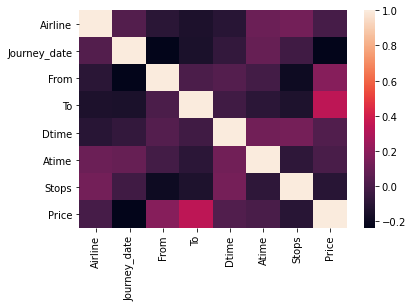

In [55]:
#checking correlation using Heatmap
sns.heatmap(dfcor)

<AxesSubplot:>

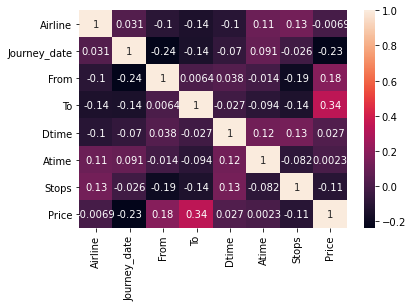

In [56]:
#Heatmap with annotations & color_palette
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)

<AxesSubplot:>

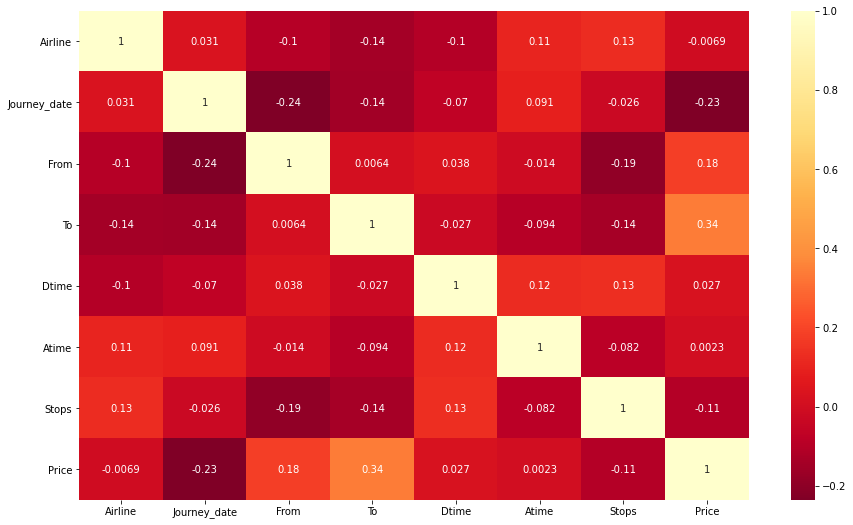

In [57]:
plt.figure(figsize=(15,9))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)  

Observations:-

1- Price is highly correlated with Source & Destination columns.

2- Price is negatively correlated with journey_Date & Stops column.

# Correlation between input and output variable "Price"

Text(0.5, 1.0, 'correaltion between input & target feature')

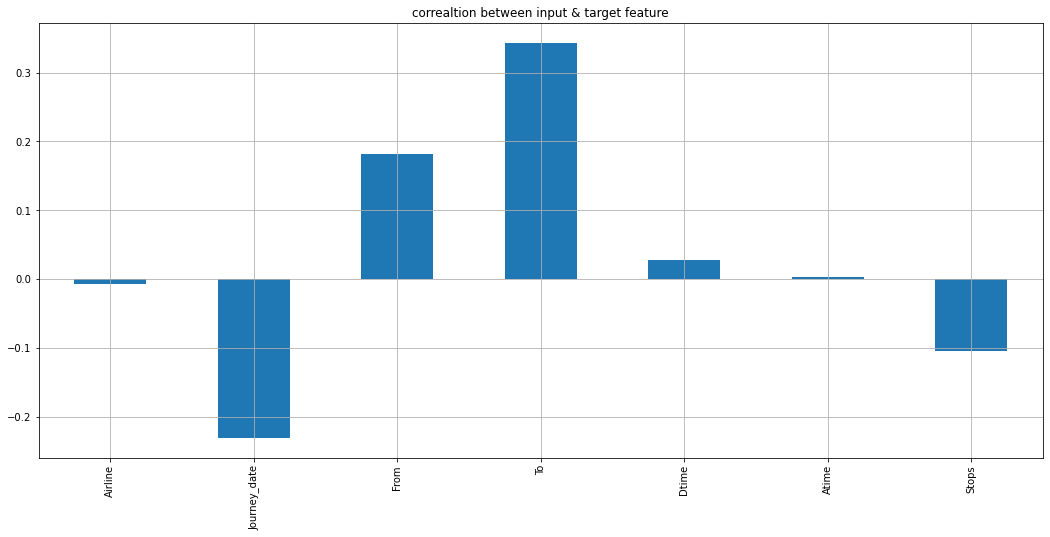

In [58]:
#Let's check correlation between input & output variable
plt.figure(figsize=(18,8))
df.drop('Price', axis=1).corrwith(df['Price']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion between input & target feature")

Observation:

1- Destination column is most positively correlated with Price column.

2- Journey_Date column is most negatively correlated with Price column.

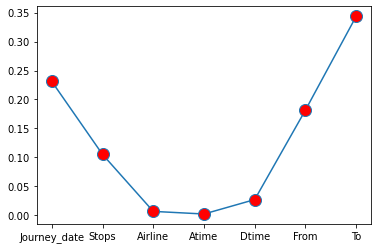

In [59]:
#checking highly correlated values with Output variable Price
abs(df.corr().loc['Price'].drop('Price').sort_values()).plot(marker='o',markerfacecolor='red',markersize=12)
plt.show()

# Plotting Outliers

Airline           AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
Journey_date    AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
From            AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
To              AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Dtime           AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Atime           AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
Stops           AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
Price           AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
dtype: object

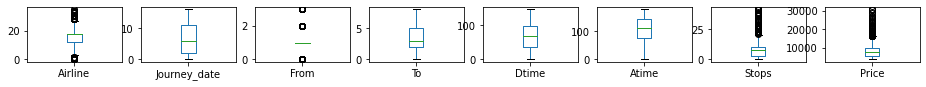

In [60]:
#Univariate Analysis(Boxplot)
df.plot(kind='box',subplots=True,layout=(10,8),figsize=(16,12))

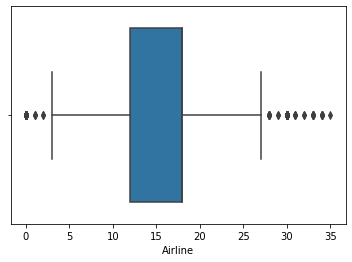

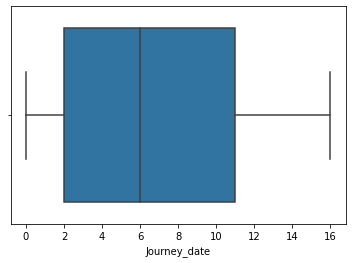

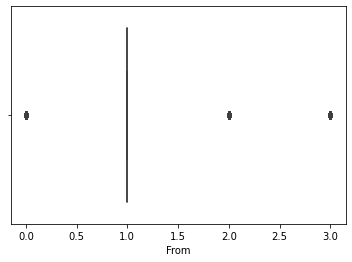

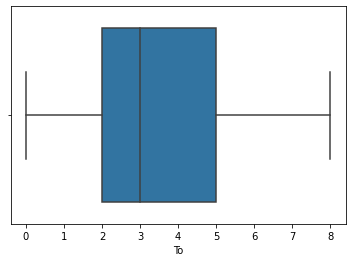

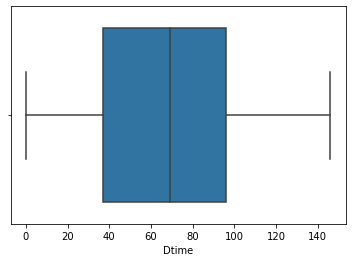

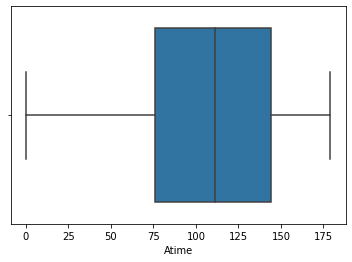

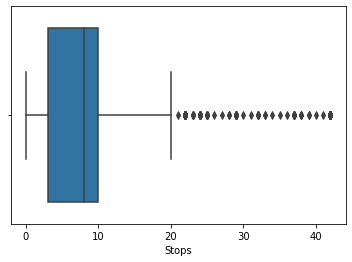

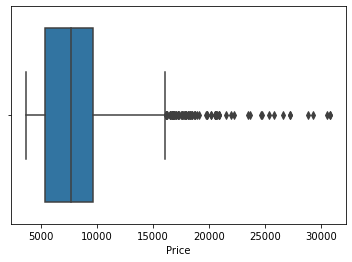

In [61]:
#checking boxplots column wise
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

Observation:

Outliers are present in various columns.

# To check Distribution of Skewness

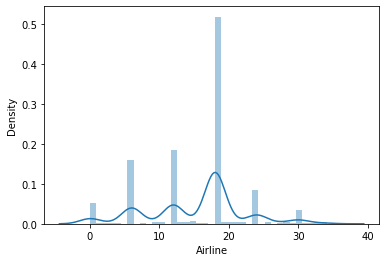

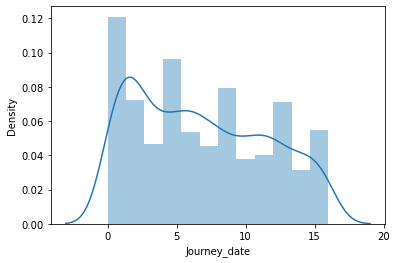

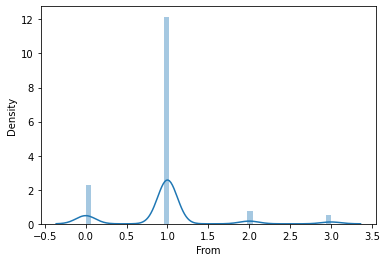

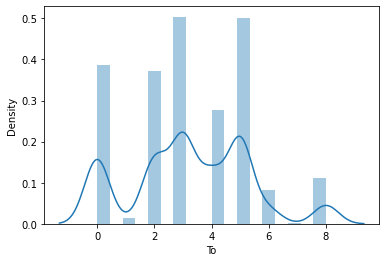

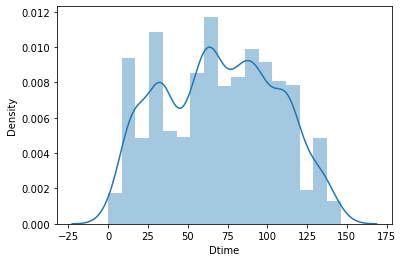

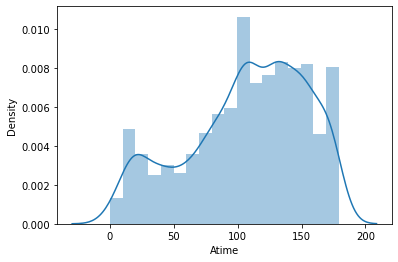

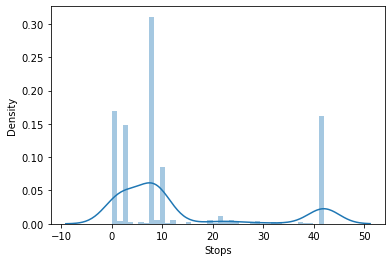

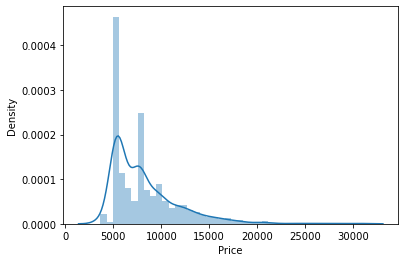

In [62]:
#Distplot for individual columns
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i],label = i)

Observation:

Skewness is present in various columns.

# Removing Outliers

In [63]:
#Let's remove the outliers using z scores
from scipy.stats import zscore
zs=np.abs(zscore(df))
print(zs.shape)

(2295, 8)


In [64]:
#checking which data have zscore more than 3
print(np.where(zs>3))

(array([  92,   93,  403,  414,  415,  431,  456,  457,  491,  492,  493,
        506,  507,  576,  606,  687,  688,  952,  953,  954, 1343, 1344,
       1345, 1346, 1377, 1378, 1414, 1567, 1793, 1794, 1795, 2221, 2222,
       2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233,
       2234, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243,
       2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254,
       2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265,
       2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276,
       2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287,
       2288, 2289, 2290, 2291, 2292, 2293, 2294, 2294], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [65]:
#Dropping Outliers
df1=df.loc[(abs(zs)<3).all(axis=1)]
print(df1.shape)

(2190, 8)


Observation:

As per above shapes: 2295-2190=105 so 105 outliers are removed and data loss is nearly 4.5%.

In [66]:
#Lets divide dataset into input and output
x=df1.drop('Price',axis=1)
x.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops
0,24,0,1,0,80,104,42
1,12,0,1,0,89,106,42
2,24,0,1,0,116,153,42
3,12,0,1,0,124,157,42
4,12,0,1,0,94,147,8


In [67]:
print(x.shape)

(2190, 7)


In [68]:
#Output feature
y=df1['Price']
y.head()

0    5315.0
1    5315.0
2    5315.0
3    5315.0
4    5315.0
Name: Price, dtype: float64

In [69]:
print(y.shape)

(2190,)


# Skewness

In [70]:
#Lets chcek the skewness in input dataset
x.skew()

Airline        -0.217217
Journey_date    0.242910
From           -0.510973
To              0.113909
Dtime           0.011993
Atime          -0.569884
Stops           1.337083
dtype: float64

In [71]:
#Let's check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

1


In [72]:
#Lets treat above skewness using cube root transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [73]:
#lets again check the skewness
x.skew()

Airline        -0.217217
Journey_date    0.242910
From           -0.510973
To              0.113909
Dtime           0.011993
Atime          -0.569884
Stops           0.289137
dtype: float64

In [74]:
#Let's again check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

0


Observation:
    
1- Skewness removed successfully.

# Data Preprocessing

In [75]:
#Lets do the preprocessing to bring features to common scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=ss.fit_transform(x)
x1=pd.DataFrame(x1,columns=x.columns)
x1.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops
0,1.272531,-1.49245,0.229692,-1.543399,0.301768,-0.099654,1.708491
1,-0.500458,-1.49245,0.229692,-1.543399,0.560798,-0.056036,1.708491
2,1.272531,-1.49245,0.229692,-1.543399,1.337888,0.968982,1.708491
3,-0.500458,-1.49245,0.229692,-1.543399,1.568137,1.056218,1.708491
4,-0.500458,-1.49245,0.229692,-1.543399,0.704704,0.838129,-0.028658


In [76]:
#Input feature
x1.shape

(2190, 7)

# Evaluate Some Algorithms (Regression)

our target varibale is "Price" which is continuous in nature so we will use Regression algorithms to make our model.

In [77]:
#Let's check coefficient of determination(r2_score) to find the proportion of the variance in the 
#dependent variable that is predictable from the independent variable.
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
def maximumr2_score(rgn,x1,y):
    maximum_r_score =0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=r_state,test_size=0.20)
        rgn.fit(x_train,y_train)
        pred=rgn.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        if r2_scr>maximum_r_score:
            maximum_r_score=r2_scr
            final_r_state=r_state
    print('Maximum r2 score for final_r_state',final_r_state,'is',maximum_r_score)
    return final_r_state

In [78]:
# creating lists to store performance score
Rscore=[]
Cvscore=[]
Mse=[]
Mae=[]
Rmse=[]
model=['Linear Regression','k-nearest neighbors','Decision Tree Regression','Random Forest Regression','Ridge Regression','Lasso regression']

# Linear Regression

In [79]:
#For Linear Regression
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
r_state=maximumr2_score(lg,x1,y)
print('Mean r2 score for linear Regression is:',cross_val_score(lg,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for linear Regression is',cross_val_score(lg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 56 is 0.22994714931788007
Mean r2 score for linear Regression is: -0.08858227625314492
	Best possible r2score is 1.0
Standard deviation in r2 score for linear Regression is 0.2375994474846784


In [80]:
#Cross Validation for Linear Regression
from sklearn import linear_model
print(cross_val_score(linear_model.LinearRegression(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(lg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(lg,x1,y,cv=5).mean()))*100)

[ 0.30308827 -0.24741723  0.071084   -0.26126468 -0.30840173]

Cross validation score is:  -0.08858227625314492


In [81]:
#Score & Error Metrics for Linear Regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=lg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.20657453079277366
Mean_Squared_Error = 7007713.918106606
Mean Absolute_Error = 2043.3671419812877
Root Mean Squared Error = 2647.208703163883


# k-nearest neighbors

In [82]:
#Let's try to do Regression based on k-nearest neighbors.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
neighbors={'n_neighbors':range(1,27)}
knreg=KNeighborsRegressor()

# GridSearchCV
In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

In [83]:
#using gridsearch CV to find the best parameters to use in k-nearest neighbors regression. 
gridknr=GridSearchCV(knreg,neighbors,cv=10)
gridknr.fit(x1,y)
gridknr.best_params_

{'n_neighbors': 21}

In [84]:
#r2 scores for k-nearest neighbors regression.
knreg=KNeighborsRegressor(n_neighbors=21)
r_state=maximumr2_score(knreg,x1,y)
print('Mean r2 score for KNN Regression is:',cross_val_score(knreg,x1,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for KNN Regression is:',cross_val_score(knreg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 85 is 0.4121355111116365
Mean r2 score for KNN Regression is: -0.09558630944238251
standard deviation in r2 score for KNN Regression is: 0.2976932191273351


In [85]:
#Cross Validation for KNeighborsRegressor
print(cross_val_score(KNeighborsRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(knreg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(knreg,x1,y,cv=5).mean()))*100)

[ 0.25169911 -0.83164876  0.18784508 -0.25139977 -0.42959975]

Cross validation score is:  -0.09558630944238251


In [86]:
#Score & Error Metrics for k-nearest neighbors regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=89,test_size=0.20)
y_pred=knreg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.3993430614065805
Mean_Squared_Error = 5775806.561550648
Mean Absolute_Error = 1661.7181996086103
Root Mean Squared Error = 2403.2907775695076


# Decision Tree Regression

In [87]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
r_state=maximumr2_score(dt,x1,y)
print('Mean r2 score for Decision Tree Regression is:',cross_val_score(dt,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Decision Tree Regression is',cross_val_score(dt,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 78 is 0.6117264667094653
Mean r2 score for Decision Tree Regression is: -0.33064967504624077
	Best possible r2score is 1.0
Standard deviation in r2 score for Decision Tree Regression is 0.42654750366886973


In [88]:
#Cross Validation for Decision Tree regression
print(cross_val_score(DecisionTreeRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(dt,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(dt,x1,y,cv=5).mean()))*100)

[ 0.20957659 -0.79018753 -0.43580087 -0.08256852 -0.93454767]

Cross validation score is:  -0.3726811793190629


In [89]:
#Score & Error Metrics for DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=80,test_size=0.20)
y_pred=dt.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.9046223423513085
Mean_Squared_Error = 937402.9212328767
Mean Absolute_Error = 272.5730593607306
Root Mean Squared Error = 968.195703994227


# Random Forest Regression

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maximumr2_score(rf,x1,y)
print('Mean r2 score for Random Forest Regression is:',cross_val_score(rf,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Random Forest Regression is',cross_val_score(rf,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 78 is 0.7549692845149463
Mean r2 score for Random Forest Regression is: -0.09441257569688591
	Best possible r2score is 1.0
Standard deviation in r2 score for Random Forest Regression is 0.5052254609414385


In [91]:
#Cross Validation for Random Forest Regression
print(cross_val_score(RandomForestRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(rf,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(rf,x1,y,cv=5).mean()))*100)

[ 0.56084482 -0.43712242  0.11931836  0.18991915 -0.88736205]

Cross validation score is:  -0.09490027550502411


In [92]:
#Score & Error Metrics for RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=60,test_size=0.20)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.920427886930983
Mean_Squared_Error = 761171.0867365357
Mean Absolute_Error = 502.17230792020007
Root Mean Squared Error = 872.451194472525


# Ridge Regression

In [93]:
from sklearn.linear_model import RidgeCV
rg=RidgeCV()
r_state=maximumr2_score(rg,x1,y)
print('Mean r2 score for Ridge Regression is:',cross_val_score(rg,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Ridge Regression is',cross_val_score(rg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 56 is 0.22967623055618724
Mean r2 score for Ridge Regression is: -0.08755797134453527
	Best possible r2score is 1.0
Standard deviation in r2 score for Ridge Regression is 0.23755946710191844


In [94]:
#Cross Validation for Ridge Regression
print(cross_val_score(linear_model.RidgeCV(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(rg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(rg,x1,y,cv=5).mean()))*100)

[ 0.30440864 -0.24263986  0.07107758 -0.26185637 -0.30877984]

Cross validation score is:  -0.08755797134453527


In [95]:
#Score & Error Metrics for Ridge Regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=rg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.20655623862451333
Mean_Squared_Error = 7007875.478690537
Mean Absolute_Error = 2044.1094801207714
Root Mean Squared Error = 2647.239218259381


# Lasso regression

In [96]:
#Using Lasso regression for a more accurate prediction.
from sklearn.linear_model import Lasso
lasso_reg=Lasso()

# GridSearch CV

In [97]:
#using gridsearch CV to find the best parameters to use in Lasso regression. 
parameters={"alpha":[0.001,0.01,0.1,1]}
gsc=GridSearchCV(lasso_reg,parameters,cv=10)
gsc.fit(x1,y)
gsc.best_params_

{'alpha': 1}

In [98]:
#As we used lasso Regression so Let's check Max & mean r2score
lasso_reg=Lasso(alpha=1)
r_state=maximumr2_score(lasso_reg,x1,y)
print('Mean r2 score for Lasso Regression is',cross_val_score(lasso_reg,x1,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Lasso Regrssion is',cross_val_score(lasso_reg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 56 is 0.22980090212477522
Mean r2 score for Lasso Regression is -0.08862109648680612
standard deviation in r2 score for Lasso Regrssion is 0.23775632081564543


In [99]:
#Cross Validation for Lasso regression
print(cross_val_score(linear_model.Lasso(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(lasso_reg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(lasso_reg,x1,y,cv=5).mean()))*100)

[ 0.30333543 -0.24688966  0.07102011 -0.26159756 -0.3089738 ]

Cross validation score is:  -0.08862109648680612


In [100]:
#Score & Error Metrics for Lasso regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=lasso_reg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.2064616641239655
Mean_Squared_Error = 7008710.782155712
Mean Absolute_Error = 2043.6507946330328
Root Mean Squared Error = 2647.396982349967


In [101]:
#Combining all scores in one place to decide best performing models
model1=pd.DataFrame({})
model1['Model']=model
model1['Maximum r2 score']=Rscore
model1['Cross Validation Score']=Cvscore
model1['Mean absolute error']=Mae
model1['Root Mean Squared Error']=Rmse
model1['Mean squared error']=Mse
model1.round(2)

,Model,Maximum r2 score,Cross Validation Score,Mean absolute error,Root Mean Squared Error,Mean squared error
0,Linear Regression,20.66,-8.86,2043.37,2647.21,7007713.92
1,k-nearest neighbors,39.93,-9.56,1661.72,2403.29,5775806.56
2,Decision Tree Regression,90.46,-33.79,272.57,968.20,937402.92
3,Random Forest Regression,92.04,-8.97,502.17,872.45,761171.09
4,Ridge Regression,20.66,-8.76,2044.11,2647.24,7007875.48
5,Lasso regression,20.65,-8.86,2043.65,2647.40,7008710.78


<AxesSubplot:xlabel='Maximum r2 score', ylabel='Model'>

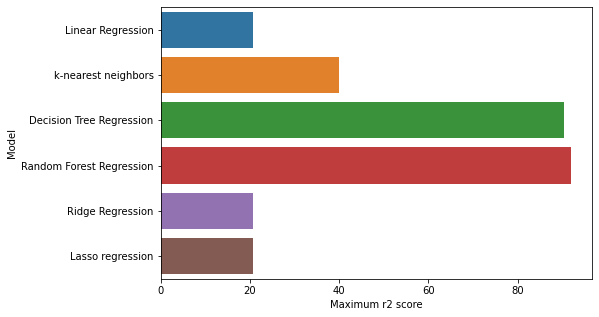

In [102]:
#Plotting bar plot of Maximum r2 scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Maximum r2 score', y = 'Model', data = model1)

Observations:

After comparing above 6 models, these 2 models are good:-

1- Random Forest Regression (R2 & Cross validation scores are higher & RMSE is minimum & other errors are less.)

2- Decision Tree Regression (R2 score is good & MAE is minimum & also other errors are less.)

# Ensemble Methods

Ensemble tend to yield better results when there is a significant diversity among the models.Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance, bias or improve predictions.The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

# ADABoost Regression
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

An AdaBoost regression is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [103]:
#Using AdaBoost Regressor to try fitting the regression on our original dataset
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

# HyperParameter Tuning to find best parameters using Grid Search CV¶

In [104]:
parameters={"learning_rate":[0.1,1],"n_estimators":[10,100],"base_estimator":[RandomForestRegressor(),DecisionTreeRegressor()]}
#using GridsearchCV to loop through predefined hyperparameters and fit our estimator on our training set.
gsc=GridSearchCV(abr,parameters,cv=5)
gsc.fit(x1,y)
gsc.best_params_

{'base_estimator': DecisionTreeRegressor(),
 'learning_rate': 1,
 'n_estimators': 100}

# Using best parameters in Adaboost Regression

In [105]:
#function to calculate max r2score for adaboost regression using DecisionTreeRegressor as best_estimator & random_state=67
def maxr2_score(rgn,x1,y):
    max_r_score =0
    x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=67,test_size=0.20)
    rgn.fit(x_train,y_train)
    y_pred=rgn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=67 #Calculated from decision tree regression
    print('Maximum r2 score for final_r_state',final_r_state,'is',max_r_score)
    return final_r_state

In [106]:
#checking r2 score for ADABoost Regression
abr=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=100)
maxr2_score(abr,x1,y)
print('Mean r2 score for ADABoost Regression is:',cross_val_score(abr,x1,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for ADABoost Regression is:',cross_val_score(abr,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 67 is 0.7122057537462779
Mean r2 score for ADABoost Regression is: -0.0804790391737149
Standard Deviation in r2 score for ADABoost Regression is: 0.499384603597441


In [108]:
#Cross Validation for ADABoost regression
print(cross_val_score(AdaBoostRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(abr,x1,y,cv=5,scoring="r2").mean()))
Cvscore.append(((cross_val_score(abr,x1,y,cv=5,scoring="r2").mean()))*100)

[ 0.22412829 -0.80205437  0.01947015  0.26265458 -0.60891568]

Cross validation score is:  -0.020801008498166507


In [109]:
#Score & Error Metrics for ADABoost regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=67,test_size=0.20)
y_pred=abr.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)
model.append('ADABoost Regression')

r2_score = 0.7122057537462779
Mean_Squared_Error = 2641338.2234625258
Mean Absolute_Error = 1076.5062964985732
Root Mean Squared Error = 1625.2194385566909


In [110]:
#After using ensemble method,Combining all scores in one place to decide best performing model
model2=pd.DataFrame({})
model2['Model']=model
model2['Maximum r2 score']=Rscore
model2['Cross Validation Score']=Cvscore
model2['Mean absolute error']=Mae
model2['Root Mean Squared Error']=Rmse
model2['Mean squared error']=Mse
model2.round(2)

,Model,Maximum r2 score,Cross Validation Score,Mean absolute error,Root Mean Squared Error,Mean squared error
0,Linear Regression,20.66,-8.86,2043.37,2647.21,7007713.92
1,k-nearest neighbors,39.93,-9.56,1661.72,2403.29,5775806.56
2,Decision Tree Regression,90.46,-33.79,272.57,968.20,937402.92
3,Random Forest Regression,92.04,-8.97,502.17,872.45,761171.09
4,Ridge Regression,20.66,-8.76,2044.11,2647.24,7007875.48
5,Lasso regression,20.65,-8.86,2043.65,2647.40,7008710.78
6,ADABoost Regression,71.22,-2.40,1076.51,1625.22,2641338.22


<AxesSubplot:xlabel='Maximum r2 score', ylabel='Model'>

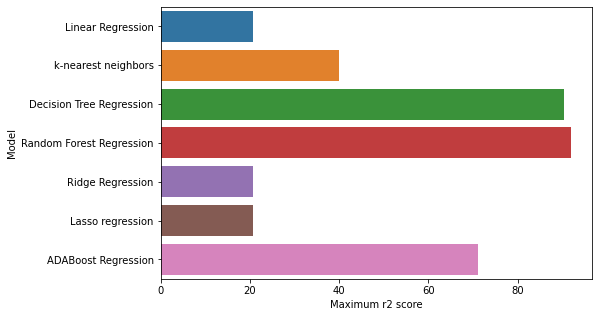

In [111]:
#Plotting bar plot of Maximum r2 scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Maximum r2 score', y = 'Model', data = model2)

Observations:

1- After comparing above 7 models on basis of scores and errors, & also after using ensemble methods still these 2 models Random Forest regression & Decision Tree Regression are giving good performance.

2- Adaboost Regression is giving good scores but errors are high so we will not select this option.

3- But when we see all the parameters very carefully and making a final decision about selection then Random Forest regression is the best option because all scores are higher , rmse is less and also other errors are less.

4- Now we are going to do Hyperparameter Tuning for Random Forest regression models using RandomizedSearchCV approach for best model selection so that we will get best results after model implementation.

# Hyperparameter Tuning
A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. However, there is another kind of parameters, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn.

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. Two best strategies for Hyperparameter tuning are:

1- GridSearchCV 2- RandomizedSearchCV

# RandomizedSearchCV

We have already used gridsearchCv to find best parameters for other models in this project. So for our final model RandomForestRegressor we are using RandomizedSearchCV to get best parameters.Using Scikit-Learn’s RandomizedSearchCV method,we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [112]:
#finding best random state for Random Forest regression
r_state=maximumr2_score(rf,x1,y)

Maximum r2 score for final_r_state 78 is 0.7531174432693306


In [113]:
# Using random_grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
random_grid ={'n_estimators': [80,100,200],'max_features': ['sqrt', 'log2','auto'],'max_depth': [None, 5,10],'min_samples_split': [4, 6,10],
          'min_samples_leaf': [1, 2,5]}
# Random search of parameters, using 3 fold cross validation 
# RandomForestRegressor gives best performance at random_state=47
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=47,n_jobs = -1)
# Fitting the random search model
rf_random.fit(x1,y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [114]:
#Using best parameters obtained from RandomizedSearchCV in RandomForestRegressor model
rfc=RandomForestRegressor(n_estimators=80,max_depth=None,min_samples_leaf= 2, max_features= 'sqrt',min_samples_split=10)
print("For RandomForest Regression R2 Score->")
r_state=maximumr2_score(rfc,x1,y)
print('Mean r2 score for Random Forest Regression is:',cross_val_score(rfc,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Random Forest Regression is',cross_val_score(rfc,x1,y,cv=5,scoring='r2').std())

For RandomForest Regression R2 Score->
Maximum r2 score for final_r_state 57 is 0.7346436178530239
Mean r2 score for Random Forest Regression is: 0.10304477386862225
	Best possible r2score is 1.0
Standard deviation in r2 score for Random Forest Regression is 0.3824821313011918


In [116]:
#Score & Error Metrics for RandomForestRegressor after Hyperparameter Tuning
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=57,test_size=0.20)
y_pred=rfc.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score*100)
print("Cross validation score =",(cross_val_score(abr,x1,y,cv=5,scoring="r2").mean())*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)

r2_score = 81.51869966196254
Cross validation score = -3.764743273956302
Mean_Squared_Error = 1588902.0765823151
Mean Absolute_Error = 895.0677519804589
Root Mean Squared Error = 1260.5165911570998


Observation:

Random Forest Regression gives best performance before HyperParameter Tuning & also after HyperParameter Tuning as compared to other models so we are going to implement Random Forest Regression model in our project.

# Building the model with best parameter

In [117]:
#We are going to use RandomForest Regressor in this project as it gives best scores at final random state 57.
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=57,test_size=0.20)
rfr=RandomForestRegressor(n_estimators=80,max_depth=None,min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=6)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(y_pred)

[ 7457.46800061  8560.58541667  6137.36212527  5313.50155754
  6344.74367514  7571.59032166  6688.05536699  8419.24291171
  5878.11635146  7402.34304563 12614.35045409  5382.71153229
  6586.07230769 12914.00676272 14136.07056863  5499.62318948
  5316.78138393  6637.98881719  6065.92750902  6476.36277226
  7334.79446834  6419.22642316  6192.89057495 10270.3934127
  5348.40011905  6982.84495806  5736.45058938  9788.40562004
  5557.85348558  5492.88278319  7146.54075921 12214.38762085
  8262.97524382  7440.01947917  7745.57764881  7624.35752615
  5429.69016671  7057.01605474 13532.95514881  7754.39920455
 12619.1565882   6276.68548521  7797.7677381   7009.42889159
  5396.62746483 14386.37820572  5890.32118867  6720.97891775
  5762.28331439  7451.91845734  8691.01993409 10026.17884921
  7940.63456894  8656.92335588  5519.59895427  8716.61550189
 11161.11346411  5335.35374369  7110.24758568  7393.33304654
  7770.80634921 14541.35494589 11358.7975983   9863.023966
  7245.00323097  6419.32240

In [118]:
print(y_test)

1263     9989.0
488     10188.0
1095     5314.0
1964     5061.0
708      5524.0
         ...   
682     12503.0
382      5735.0
1549     8918.0
1010     6456.0
59      11711.0
Name: Price, Length: 438, dtype: float64


Text(0, 0.5, 'Predcited Values')

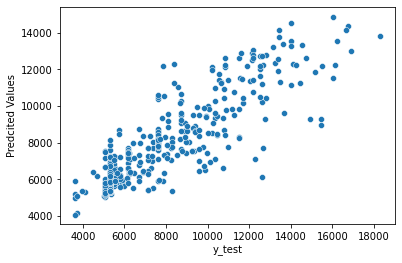

In [119]:
#ScatterPlot between y_test and Predicted values
sns.scatterplot(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("Predcited Values")

In [120]:
#Error Metrics & R2Score for our final model
m1=mean_absolute_error(y_test,y_pred)
m2=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error is: ",m1)
print("Mean Squared Error is: ",m2)
print('Root Mean Square Error after model fitting is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Score is:',(rfr.score(x_train,y_train))*100)
print('r2_score after model fitting is:',(r2_score(y_test,y_pred))*100)

Mean Absolute Error is:  1006.1502122972717
Mean Squared Error is:  2169812.650535245
Root Mean Square Error after model fitting is: 1473.0283943411428
Score is: 86.27967347248958
r2_score after model fitting is: 74.76184350009092


# Evaluate Predictions

In [121]:
#lets make the dataframe for Predictions using Pandas
predict=pd.DataFrame(y_pred,columns=['Predicted Values'])
predict=pd.concat([predict,y_test.reset_index()['Price']],axis=1)
predict.columns=['Predicted Values','Real Values']
predict.round(2)

,Predicted Values,Real Values
0,7457.47,9989.0
1,8560.59,10188.0
2,6137.36,5314.0
3,5313.50,5061.0
4,6344.74,5524.0
...,...,...
433,10493.66,12503.0
434,8472.41,5735.0
435,8288.06,8918.0
436,7160.81,6456.0


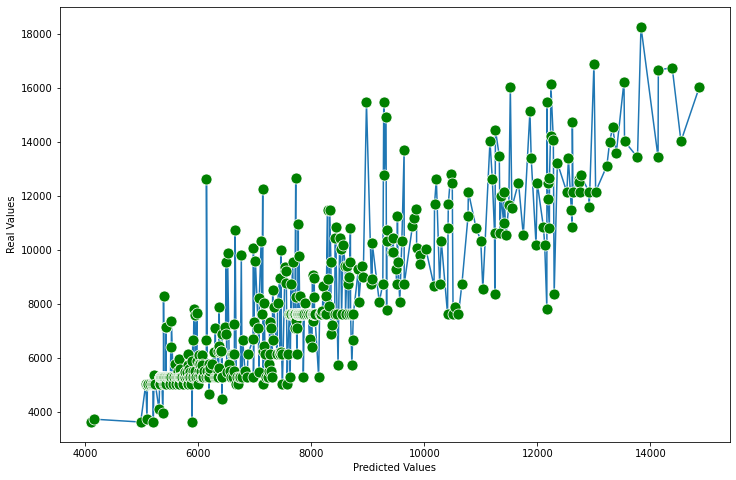

In [122]:
#Graph showing how close are predicted and Real Values
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8))
sns.lineplot(x='Predicted Values',y='Real Values',data=predict,ax=ax,marker='o',markerfacecolor='green',markersize=11)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Real Values')
plt.show()

# Conclusion
1- Above Plot shows Predicted values are nearly close to real values.

2- Graph is linear except few deviations and it shows good relation between predicted and real values.

3- R2 Score is best and error is minimum for our selected model.

4- RandomForest Regressor is best selection for this project.

# Saving our model

In [123]:
import joblib
#saving model
joblib.dump(rfr,'Flight Price- Prediction Project.pkl')

['Flight Price- Prediction Project.pkl']

# Loading the saved model

In [124]:
eval=joblib.load('Car Price- Prediction Project.pkl')
eval

RandomForestRegressor(max_features='sqrt', min_samples_split=6, n_estimators=80)

Result is OK as per our model.

# ||HAPPY ENDING||